3 -- 6 == 1.80
6 -- 8 == 1.80
4 -- 9 == 2.55
4 -- 6 == 2.70
0 -- 4 == 3.00
2 -- 3 == 3.00
5 -- 4 == 3.00
1 -- 3 == 3.30
3 -- 7 == 3.30
Total cost of kruskal:  24.450000000000003


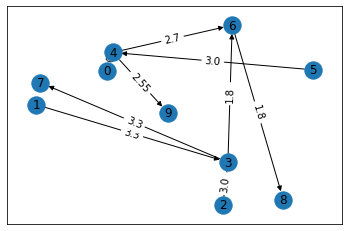

In [12]:
import networkx as nx
import matplotlib.pyplot as plt


def matrixToEdgeList(nodes, m):
	edgeList = []
	for i in range(nodes):
		for j in range(nodes):
			if m[(i, j)] != 0:
				edgeList.append((i, j, m[(i, j)]))
	return edgeList

def edgeListToMatrix(nodes, m):
	graph = [[0 for column in range(nodes)] for row in range(nodes)]
	for tup in m:
		if (graph[tup[0]][tup[1]] == 0):
			graph[tup[0]][tup[1]] = tup[2]
		else:
			graph[tup[0]][tup[1]] = min(tup[2], graph[tup[0]][tup[1]])
	return graph

def printMatrix(nodes, mat):
	for i in range(nodes):
		for j in range(nodes):
			print(mat[i][j], end="\t")
		print()


def inputFile(filePath):
	file = open(filePath)
	lines = file.read()
	lines = list(filter(None, lines.split('\n')))
	nodes = int(lines[1])
	pos = {}
	for i in range(nodes):
		node = lines[i+2].split('\t')
		pos[int(node[0])] = (float(node[1]), float(node[2]))
	edgeList = []
	j = nodes+2
	while j < len(lines):
		tok = (list(filter(None, lines[j].split('\t'))))
		if len(tok) > 1:
			node1 = int(tok.pop(0))
			for index in range(0, len(tok), 4):
				if node1 == int(tok[index]):
					continue
				edgeList.append((node1, int(tok[index]), float(tok[index+2])/10000000.0))
		j += 1
	AdjMatrix = edgeListToMatrix(nodes, edgeList)
	for i in range(nodes):
		for j in range(nodes):
			if AdjMatrix[i][j] == 0:
				AdjMatrix[i][j] = AdjMatrix[j][i]
	return nodes, edgeList, AdjMatrix, pos;

import sys

class Graph(): 

	def __init__(self, vertices, adjMatrix): 
		self.V = vertices 
		self.graph = [[0 for column in range(vertices)] for row in range(vertices)] 
		for i in range(len(self.graph)):
			for j in range(len(self.graph[i])):
				self.graph[i][j] = adjMatrix[i][j]

	def find(self, parent, i): 
		if parent[i] == i: 
			return i 
		return self.find(parent, parent[i]) 
	
	# A function that does union of two sets of x and y 
	# (uses union by rank) 
	def union(self, parent, rank, x, y): 
		xroot = self.find(parent, x) 
		yroot = self.find(parent, y) 
	
		if rank[xroot] < rank[yroot]: 
			parent[xroot] = yroot 
		elif rank[xroot] > rank[yroot]: 
			parent[yroot] = xroot 
	
		else : 
			parent[yroot] = xroot 
			rank[xroot] += 1

	def KruskalMST(self): 
		graph = []
		for i in range(self.V):
			for j in range(self.V):
				if self.graph[i][j] != 0: 
					graph.append((i, j, self.graph[i][j]))
		result =[]
	
		i = 0
		e = 0 
		graph =  sorted(graph,key=lambda item: item[2]) 
	
		parent = [] ; rank = [] 
	
		# Create V subsets with single elements 
		for node in range(self.V): 
			parent.append(node) 
			rank.append(0) 
	  
		# Number of edges to be taken is equal to V-1 
		while e < self.V -1 : 
  
			# Step 2: Pick the smallest edge and increment  
					# the index for next iteration 
			u,v,w =  graph[i] 
			i = i + 1
			x = self.find(parent, u) 
			y = self.find(parent ,v) 
	
			# If including this edge does't cause cycle,  
						# include it in result and increment the index 
						# of result for next edge 
			if x != y: 
				e = e + 1	 
				result.append([u,v,w]) 
				self.union(parent, rank, x, y)			 
			# Else discard the edge 
	
		summ = 0
		for u,v,weight  in result: 
			#print str(u) + " -- " + str(v) + " == " + str(weight) 
			print ("%d -- %d == %.2f" % (u,v,weight)) 
			summ += weight
		print("Total cost of kruskal: ", summ)
		return result


nodes, edgeList, A, pos = inputFile("benchmark/input10.txt")


labels = dict()
for i in range(nodes):
	labels[i] = str(i)
    


g = Graph(nodes, A)
edgeList = g.KruskalMST()

fig = plt.figure()

X=nx.DiGraph()

X.add_nodes_from(pos.keys())
X.add_weighted_edges_from(edgeList)


edge_labels = nx.get_edge_attributes(X,'weight')

nx.draw_networkx_nodes(X, pos)
nx.draw_networkx_labels(X, pos, labels)
nx.draw_networkx_edges(X, pos)
nx.draw_networkx_edge_labels(X, pos, edge_labels=edge_labels)

plt.show()



